### Introduction:

The cost of healthcare and insurance has been a growing concern, impacting individuals and the economy.
Predicting insurance expenses is a crucial task for insurance companies to assess risk, set premiums, and ensure financial stability. 
This project aims to develop a machine-learning model capable of accurately predicting insurance expenses based on individual characteristics and health-related factors.
By leveraging data analysis and regression techniques, 
we aim to identify key factors influencing insurance costs and build a robust predictive model. 
The project explores various

### Importing the necessary libraries

In [1]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computing with arrays
import seaborn as sns # Statistical visualizations
import matplotlib.pyplot as plt # Creating visualizations
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computing with arrays
import seaborn as sns # Statistical visualizations
import matplotlib.pyplot as plt # Creating visualizations
# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


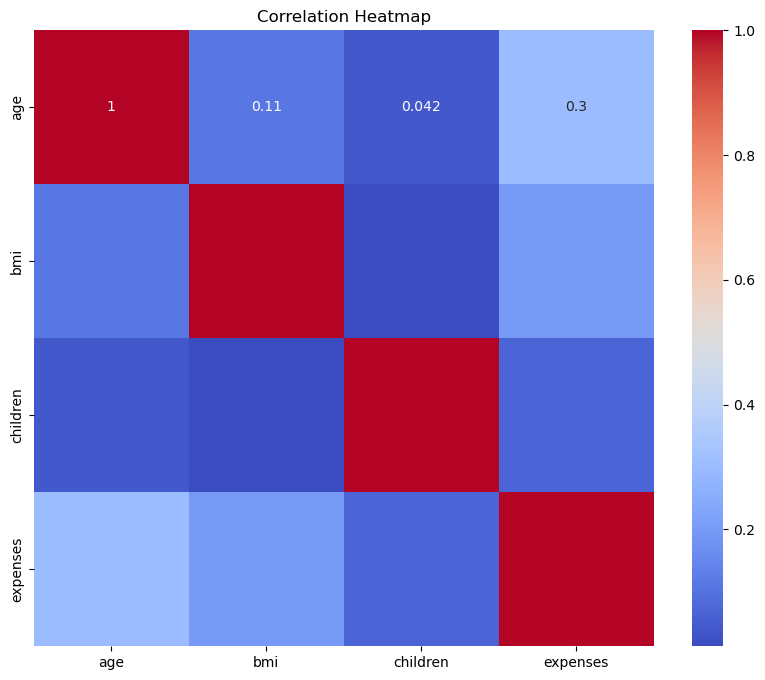

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, only including numerical features
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

## Handling Missing Values

In [4]:
# Checking for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


## Encoding Categorical Features

In [5]:
'''Categorical features were encoded into numerical format
using LabelEncoder:
sex: Male = 1, Female = 0
smoker: Yes = 1, No = 0
region: Converted to numeric values.'''
# Encoding categorical features
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex']) # Male=1, Female=0
df['smoker'] = label_encoder.fit_transform(df['smoker']) # Yes=1,
No=0
df['region'] = label_encoder.fit_transform(df['region']) # Convert region to numeric

### Feature and Target Variables

In [6]:
 # Split the dataset into features and target variable
X = df.drop(columns=['expenses']) # Features
y = df['expenses'] # Target

## Data Splitting

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

#### Feature Scaling

In [8]:
 # Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [9]:
# Train Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Predict using Linear Regression
y_pred_lr = lr_model.predict(X_test)
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Multiple Linear Regression - MSE: {mse_lr}, R²: {r2_lr}')

Multiple Linear Regression - MSE: 33639075.08997808, R²: 0.7833214205203847


## Support Vector Regression (SVR)

In [10]:
# Train Support Vector Regression model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predict using SVR
y_pred_svr = svr_model.predict(X_test_scaled)
# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression - MSE: {mse_svr}, R²: {r2_svr}')

Support Vector Regression - MSE: 165839831.41095182, R²: -0.06822018724199541


### Polynomial Regression

In [12]:
# Generate polynomial features (degree=2 for example)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
# Train Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
# Predict using Polynomial Regression
y_pred_poly = poly_model.predict(X_test_poly)
# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression - MSE: {mse_poly}, R²: {r2_poly}')

Polynomial Regression - MSE: 20518415.50844142, R²: 0.8678352150393653


## Decision Tree Regression

In [13]:
# Train Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
# Predict using Decision Tree Regression
y_pred_dt = dt_model.predict(X_test)
# Evaluate Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression - MSE: {mse_dt}, R²: {r2_dt}')

Decision Tree Regression - MSE: 42563059.72459814, R²: 0.725839569168786


## Random Forest Regression

In [14]:
# Train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict using Random Forest Regression
y_pred_rf = rf_model.predict(X_test)
# Evaluate Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - MSE: {mse_rf}, R²: {r2_rf}')

Random Forest Regression - MSE: 21193479.70155039, R²: 0.8634869400041821


## Model Evaluation

In [15]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have y_test and predictions from your models (y_pred_lr, y_pred_svr, etc.)

# Create a Pandas DataFrame to store the evaluation results
results = pd.DataFrame({'Model': ['Linear Regression', 'Support Vector Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression'],
                        'MSE': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf)],
                        'R²': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)],
                        'MAE': [mean_absolute_error(y_test, y_pred_lr),mean_absolute_error(y_test, y_pred_svr),mean_absolute_error(y_test, y_pred_poly),mean_absolute_error(y_test, y_pred_dt),mean_absolute_error(y_test, y_pred_rf)]})

# Display the results
print(results)

                       Model           MSE        R²          MAE
0          Linear Regression  3.363908e+07  0.783321  4186.940106
1  Support Vector Regression  1.658398e+08 -0.068220  8599.332364
2      Polynomial Regression  2.051842e+07  0.867835  2726.713396
3   Decision Tree Regression  4.256306e+07  0.725840  3017.329590
4   Random Forest Regression  2.119348e+07  0.863487  2537.901510


### Results Visualization

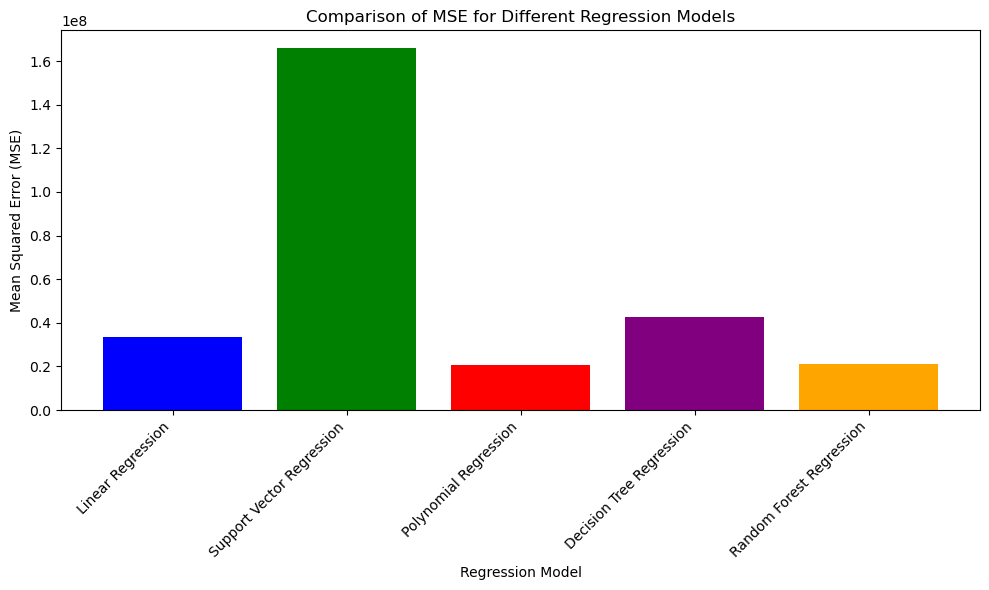

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the MSE values stored in variables: mse_lr, mse_svr, mse_poly, mse_dt, mse_rf

models = ['Linear Regression', 'Support Vector Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_values = [mse_lr, mse_svr, mse_poly, mse_dt, mse_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparison of MSE for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### R² Score Comparison of Regression Models

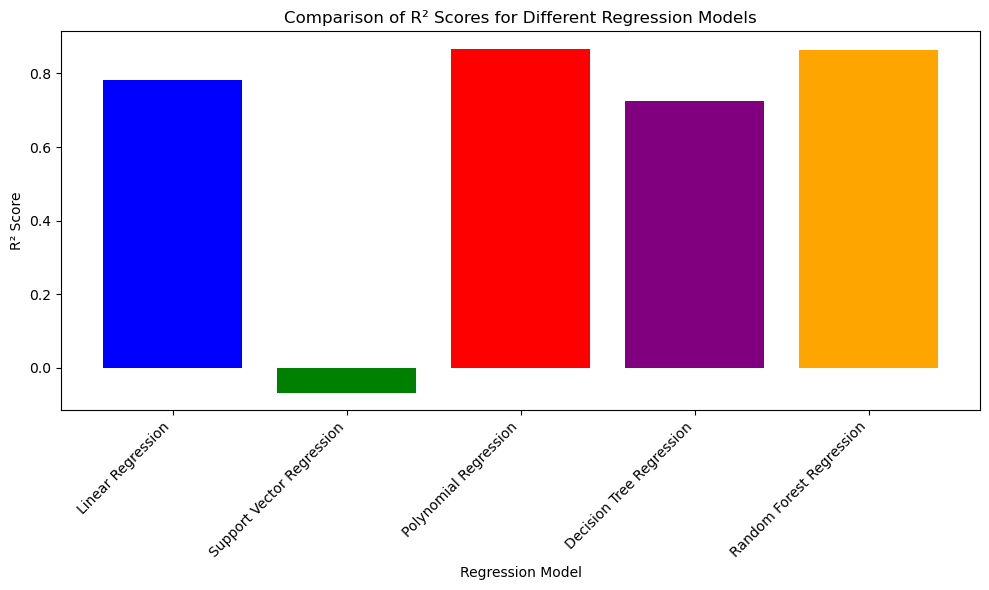

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the R² values stored in variables: r2_lr, r2_svr, r2_poly, r2_dt, r2_rf

models = ['Linear Regression', 'Support Vector Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression']
r2_values = [r2_lr, r2_svr, r2_poly, r2_dt, r2_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparison of R² Scores for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Conclusion:

After evaluating five regression models (Linear Regression, Support Vector Regression, Polynomial Regression, Decision Tree Regression, and Random Forest Regression) on the insurance dataset, it was observed that the **Random Forest Regression** model exhibited the best performance. It achieved the lowest Mean Squared Error **(MSE) of approximately 21,19,3479** and the highest **R-squared (R²) score of about 0.865.** These results indicate that the Random Forest Regression model provides the most accurate and reliable predictions for insurance expenses compared to the other models considered.

This conclusion summarizes the key findings and clearly highlights the best-performing model along with its performance metrics (MSE and R² score)